## Lab | Cleaning numerical data

##### Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##### Load the customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('customer_value_analysis.csv')

##### First look at its main features (head, shape, info).

In [3]:
customer_df.shape
display(customer_df.head())
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

##### Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [4]:
customer_df.columns = [col.lower().replace(' ', '_') for col in customer_df.columns]
display(customer_df.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


##### Change the type of effective_to_date column to DateTime format.

In [5]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

C:\Users\vikto\AppData\Local\Temp\ipykernel_28512\332620236.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

##### Check NaN values per column.

In [6]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

##### Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [7]:
def separate_numerical_categorical(dataframe):
    numerical_columns = dataframe.select_dtypes(include=['number'])
    categorical_columns = dataframe.select_dtypes(exclude=['number'])

    return numerical_columns, categorical_columns

numerical_columns, categorical_columns = separate_numerical_categorical(customer_df)
display(numerical_columns)
display(categorical_columns)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


##### Drop any ID column.

In [8]:
customer_df = customer_df.drop(columns=['customer'])

##### Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


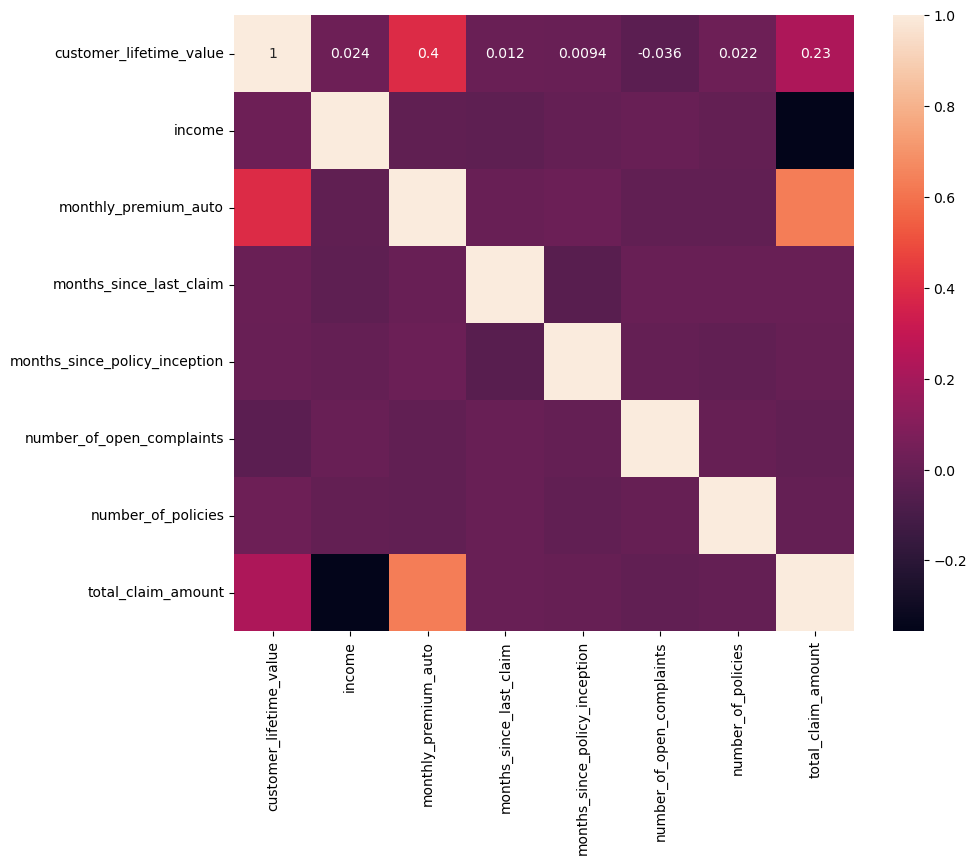

In [9]:
corr_matrix = numerical_columns.corr() 
display(corr_matrix)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

##### Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [10]:
def categorize_numerical_columns(df, threshold=36):
    continuous_cols = []
    discrete_cols = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            unique_values = df[col].nunique()
            if unique_values > threshold:
                continuous_cols.append(col)
            else:
                discrete_cols.append(col)

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df
continuous_df, discrete_df = categorize_numerical_columns(numerical_columns)
display(continuous_df)
display(discrete_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


##### Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


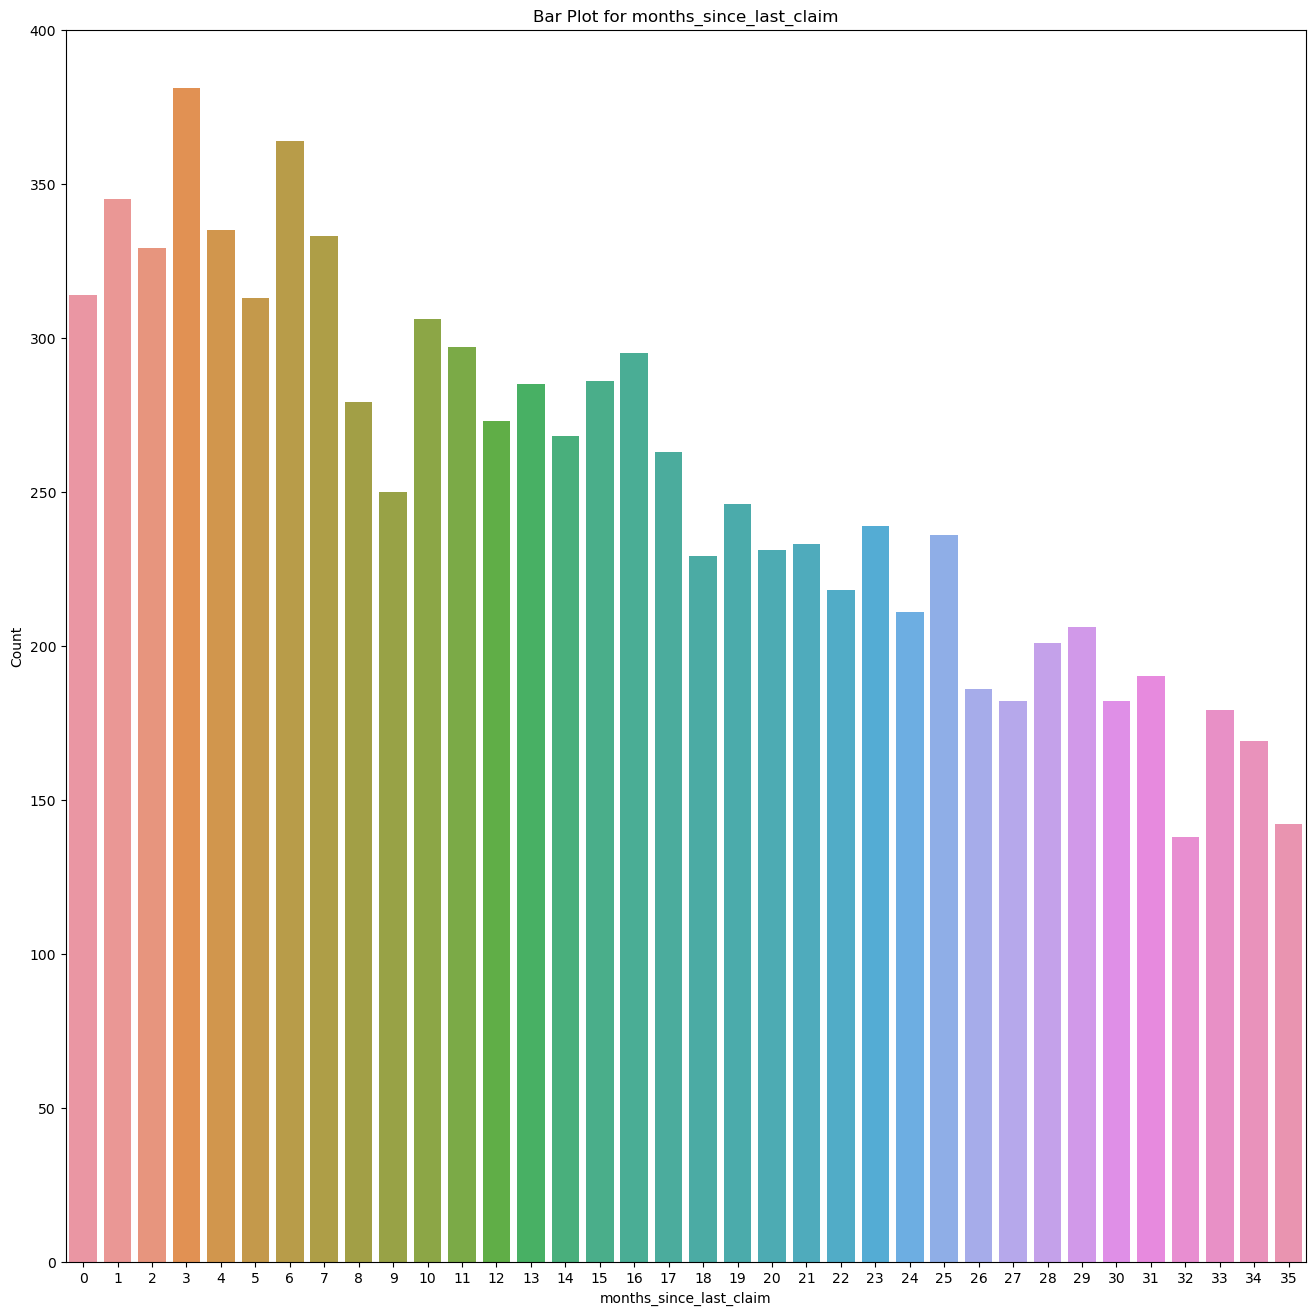

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


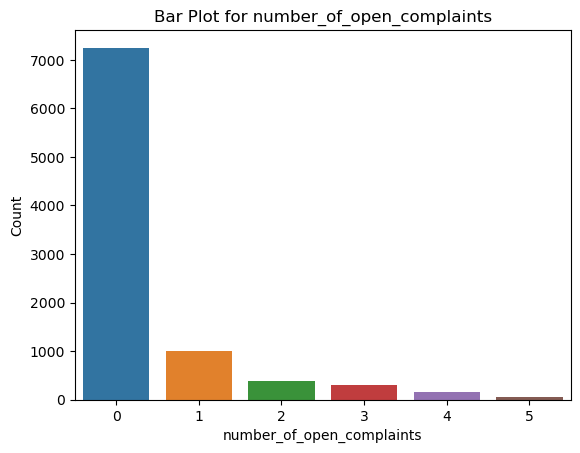

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


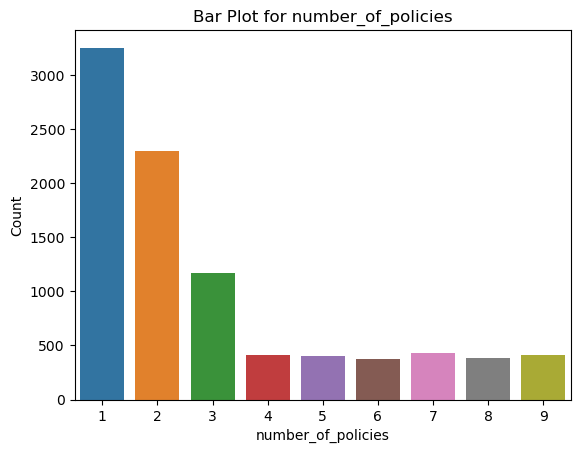

In [11]:
def create_barplot(dataframe):
    plt.figure(figsize=(16, 16))

    for column in dataframe.columns:
        # Create a bar plot for the current column
        sns.countplot(x=column, data=dataframe)
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()
      
create_barplot(discrete_df)

##### Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


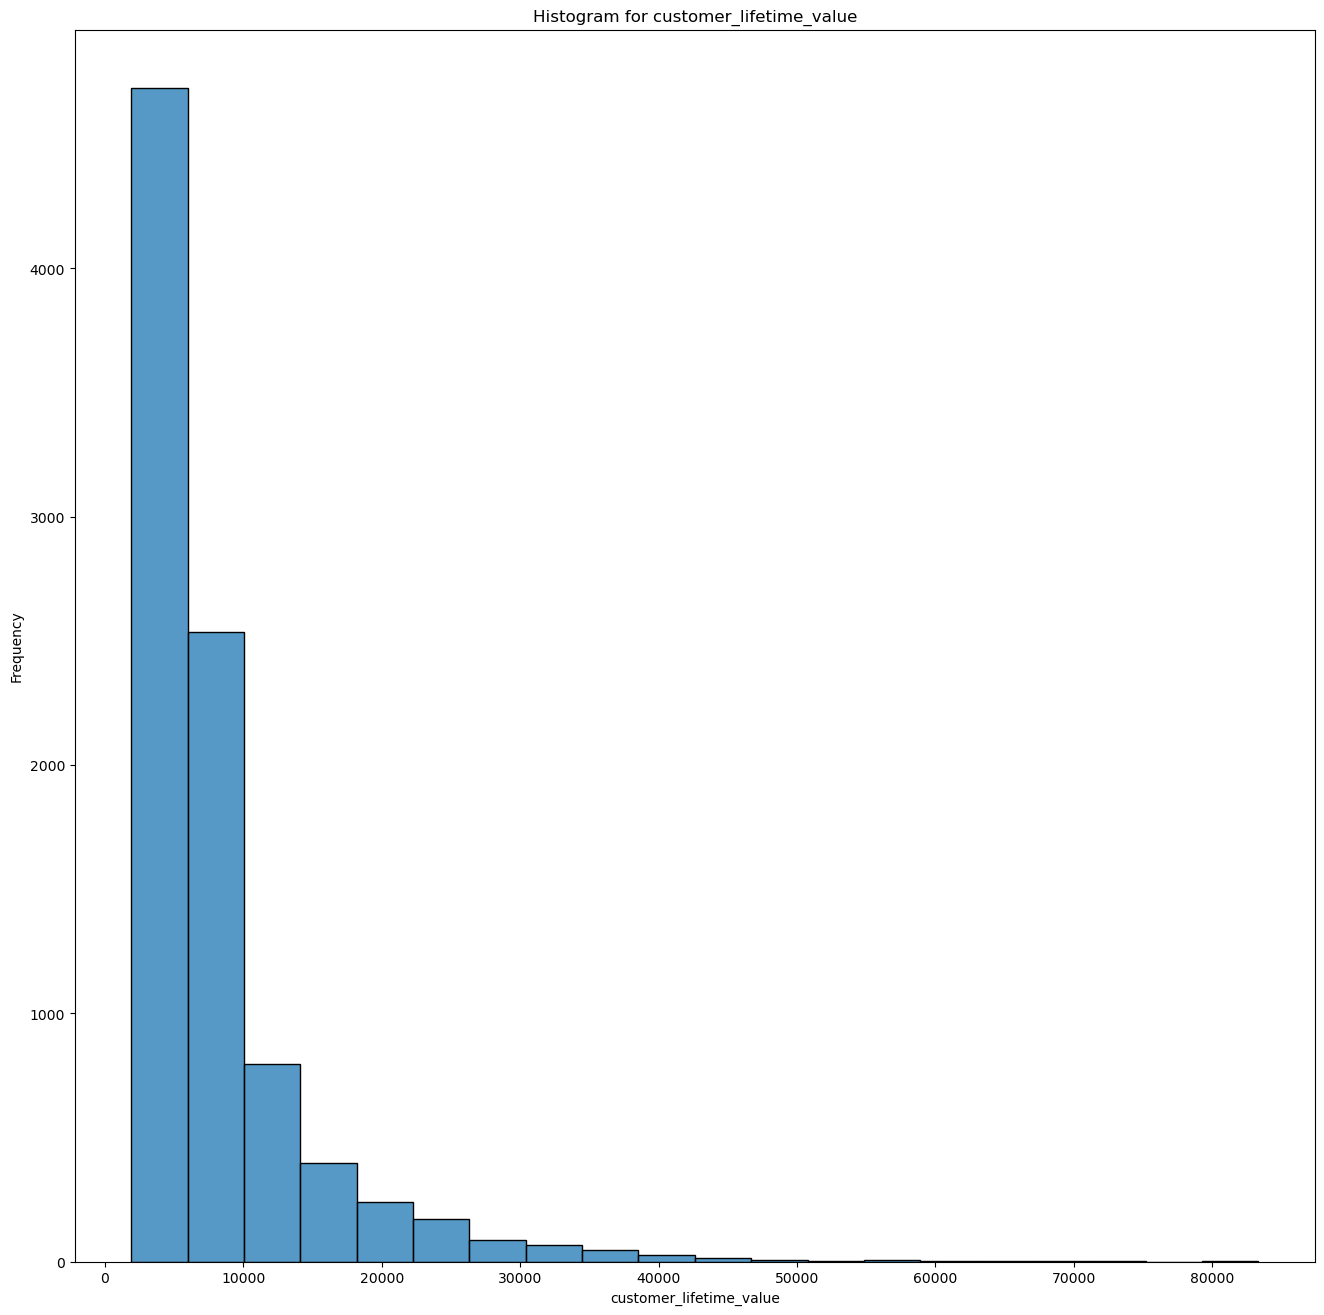

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


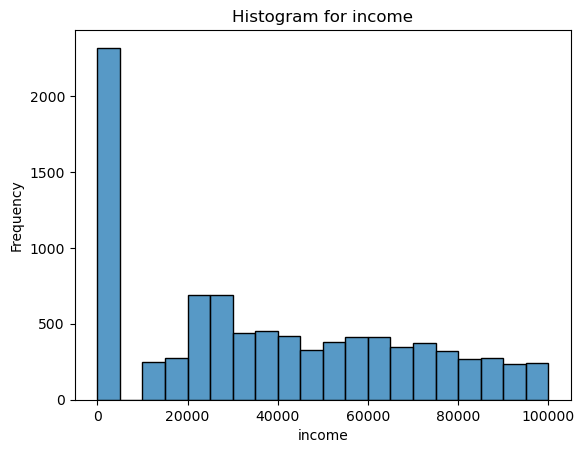

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


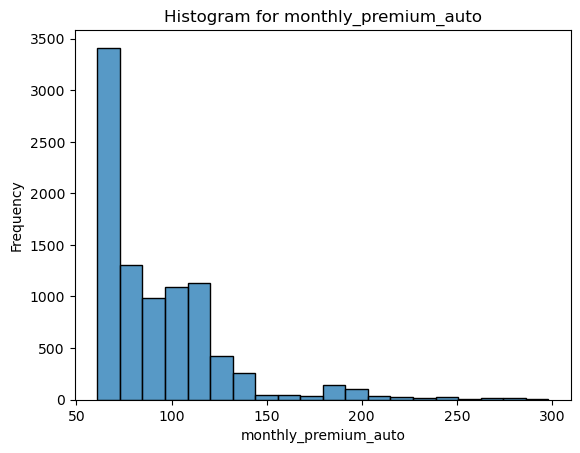

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


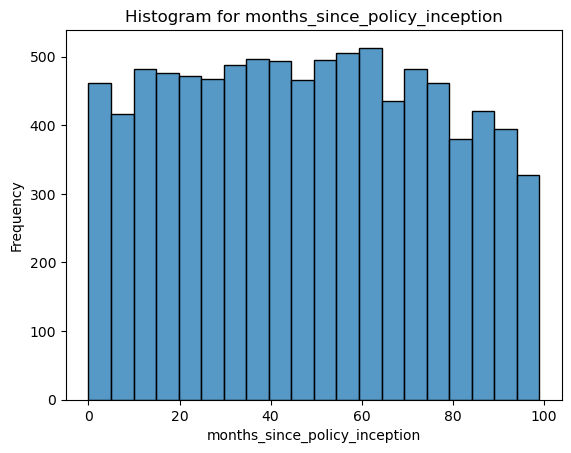

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


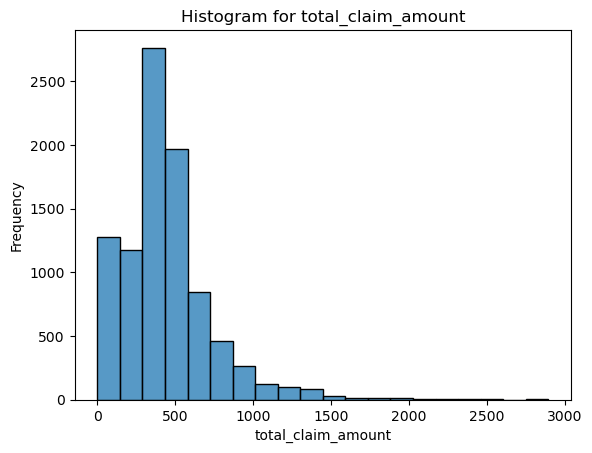

In [12]:
def create_histograms(dataframe):
    plt.figure(figsize=(16, 16))

    for column in dataframe.columns:
        sns.histplot(dataframe[column], bins=20)
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

create_histograms(continuous_df)

##### According to the previous histogram plots, do you think that you will have to apply any transformation?

In [13]:
continuous_df.skew()

customer_lifetime_value          3.032280
income                           0.286887
monthly_premium_auto             2.123546
months_since_policy_inception    0.040165
total_claim_amount               1.714966
dtype: float64

##### Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

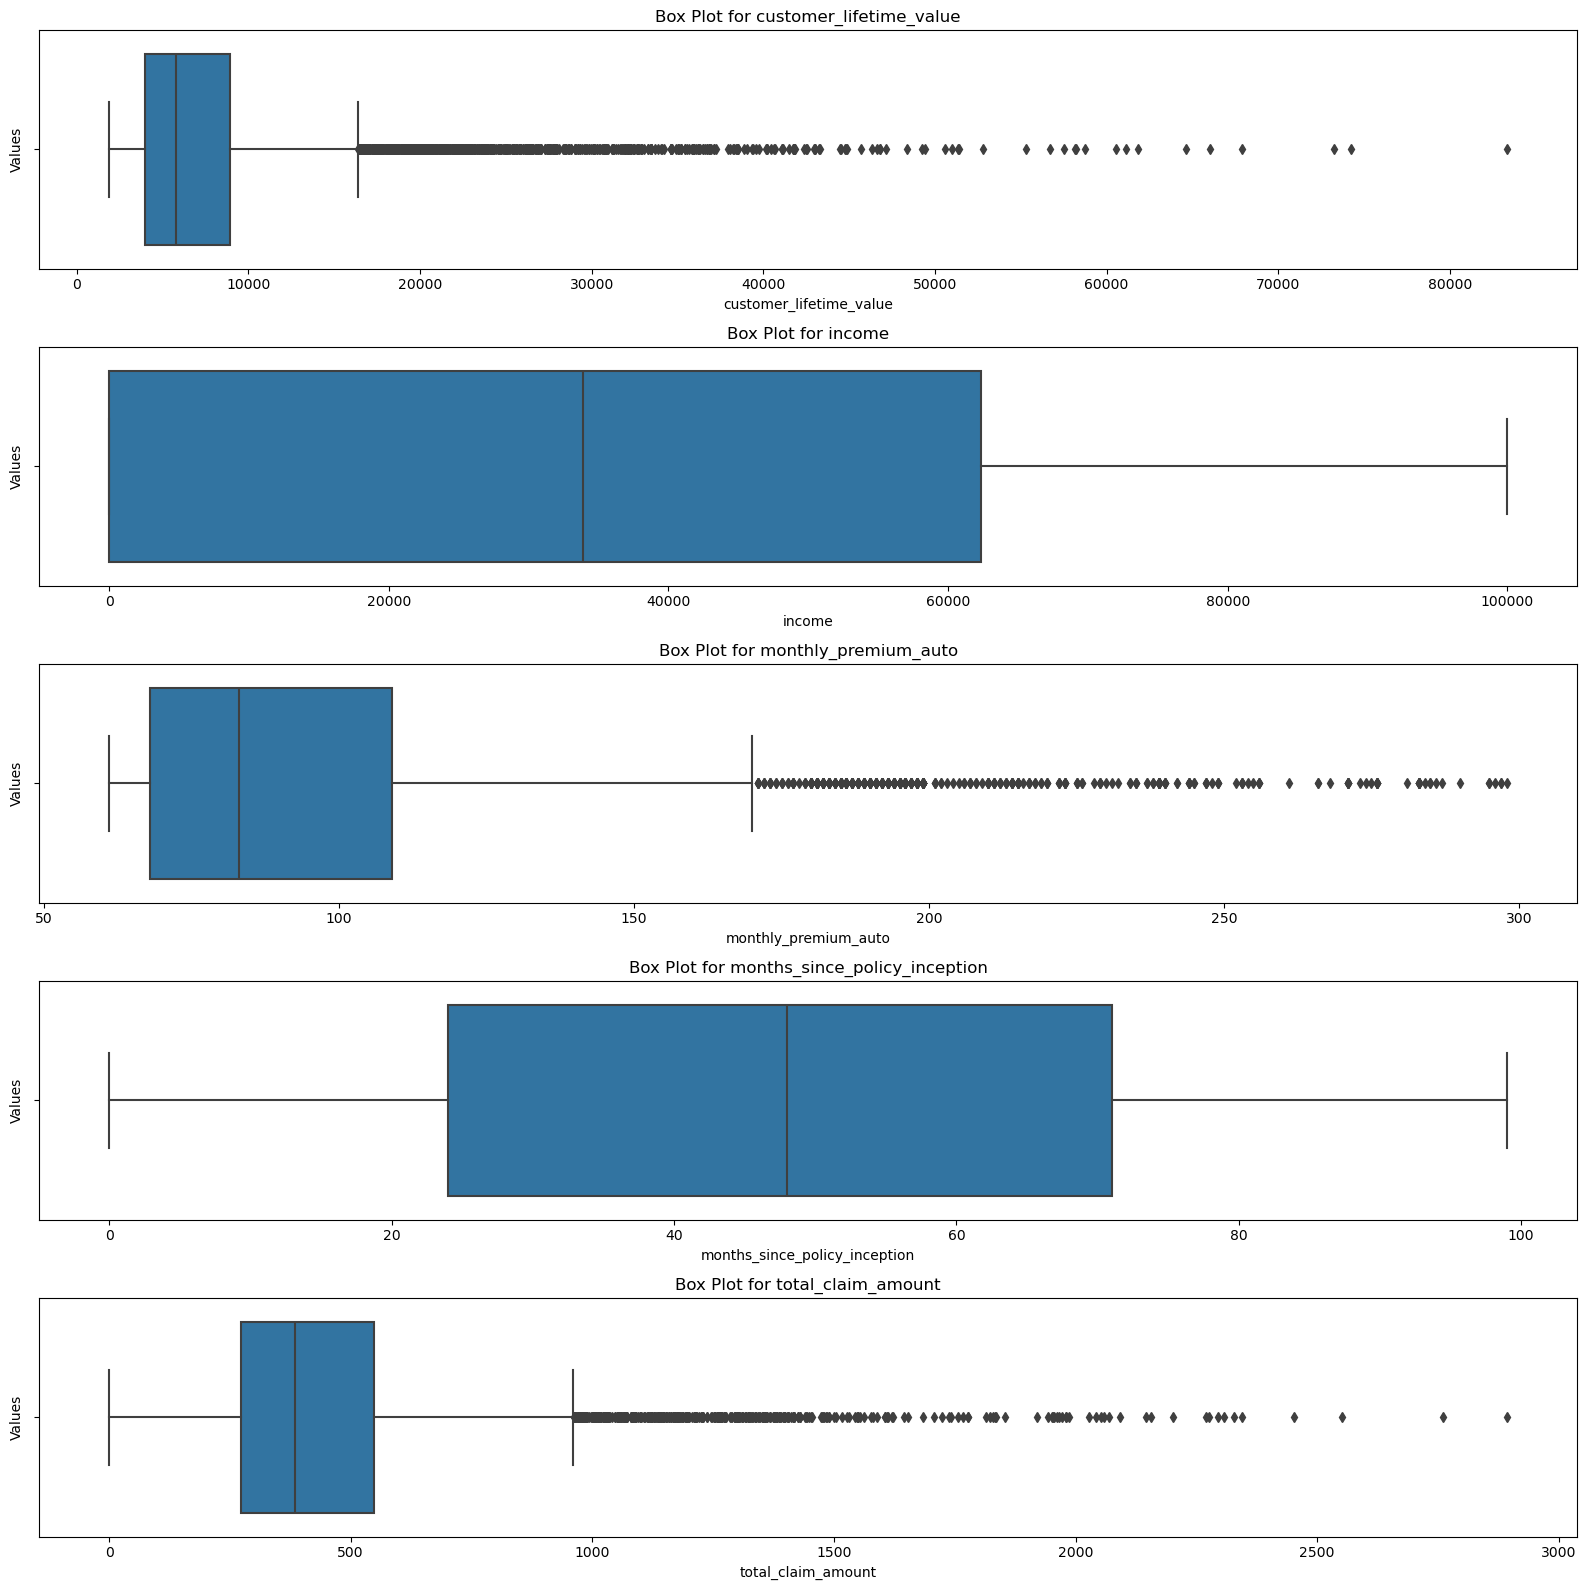

In [14]:
def create_individual_boxplots(dataframe):
    plt.figure(figsize=(16, 16))

    for i, column in enumerate(dataframe.columns, 1):
        plt.subplot(len(dataframe.columns), 1, i)

        sns.boxplot(x=dataframe[column])
        plt.title(f'Box Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Values')

    plt.tight_layout()
    plt.show()

create_individual_boxplots(continuous_df)

## Lab | Cleaning categorical data

##### Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [15]:
display(categorical_columns)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [16]:
#dropping id columns and the date column
categorical_columns = categorical_columns.drop(columns=['customer'])

In [17]:
#dropping id columns and the date column
categorical_columns = categorical_columns.drop(columns=['effective_to_date'])

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


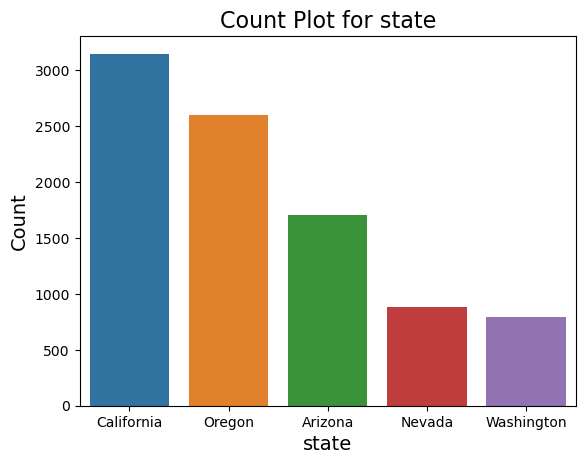

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


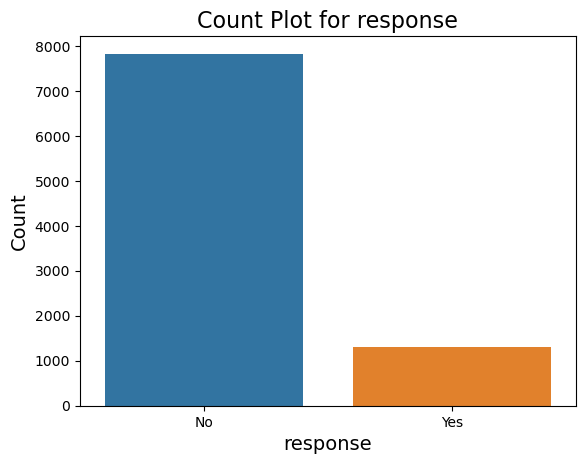

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


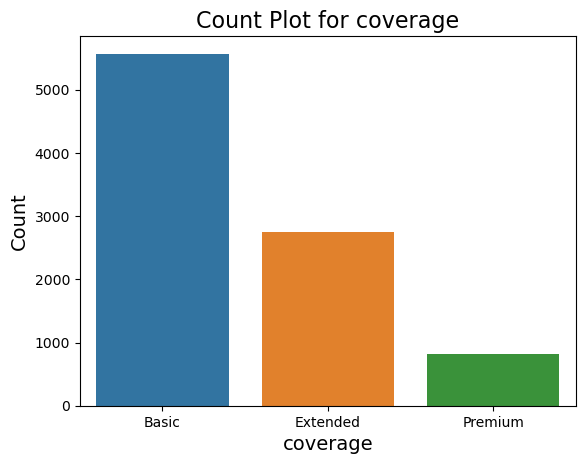

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


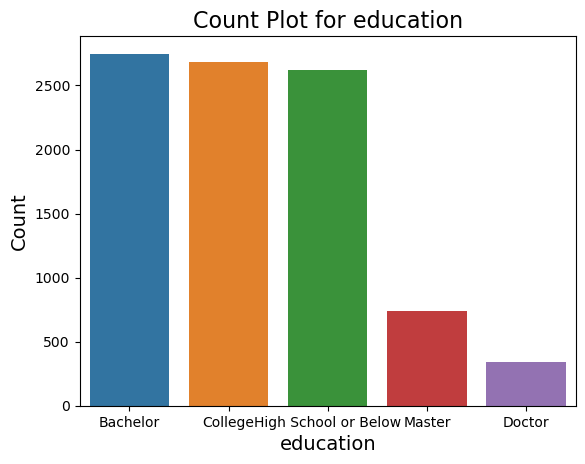

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


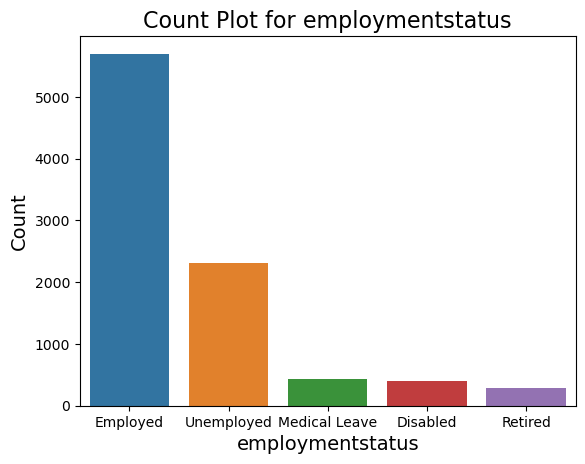

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


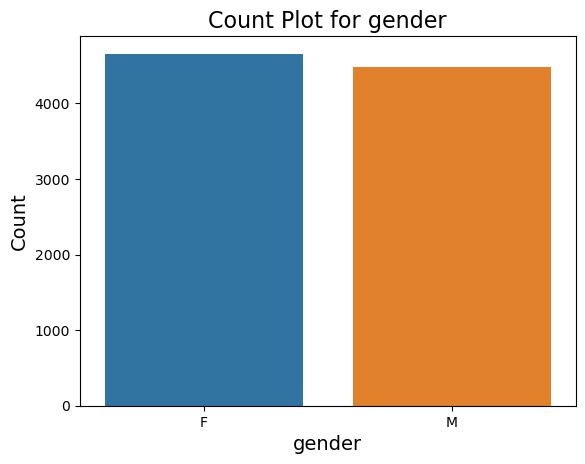

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


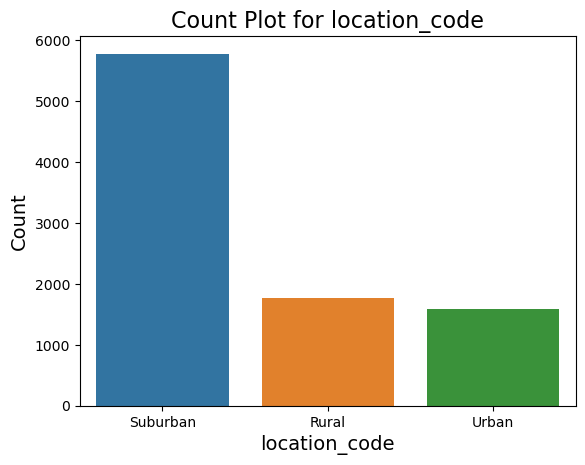

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


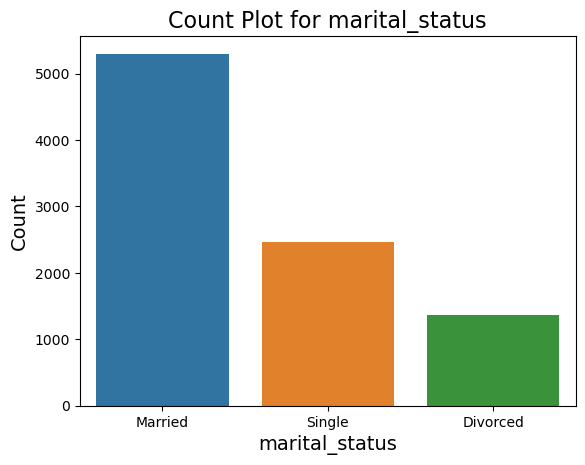

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


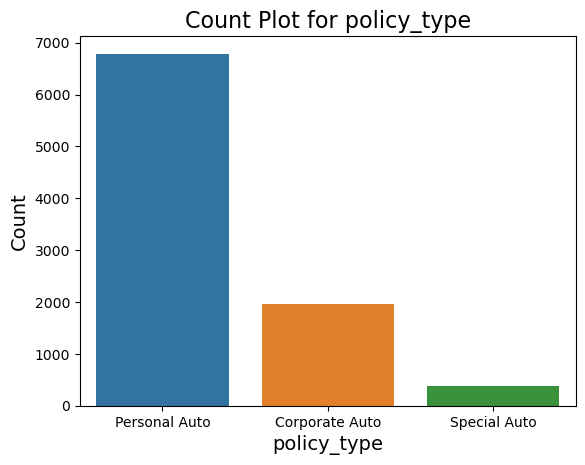

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


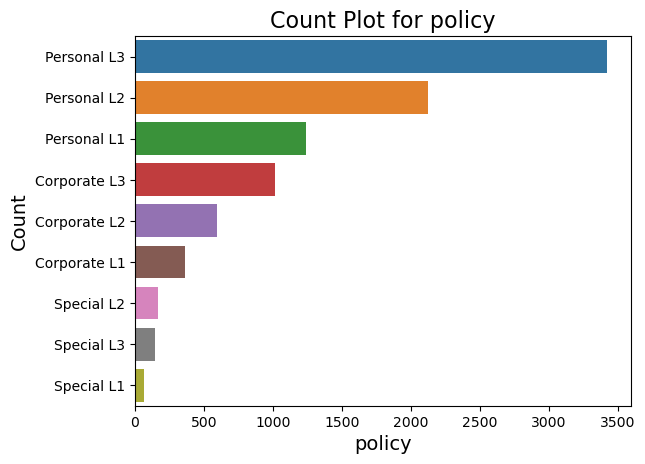

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


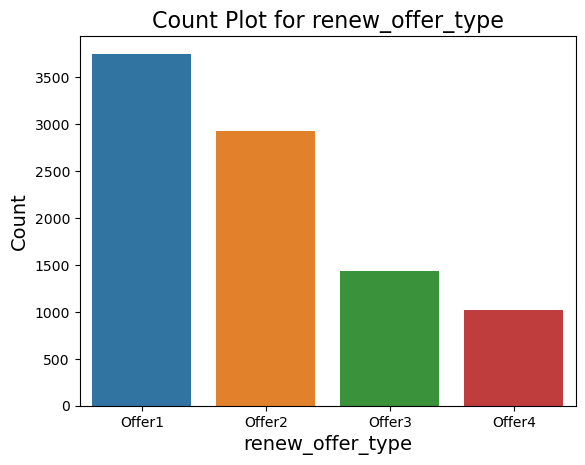

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


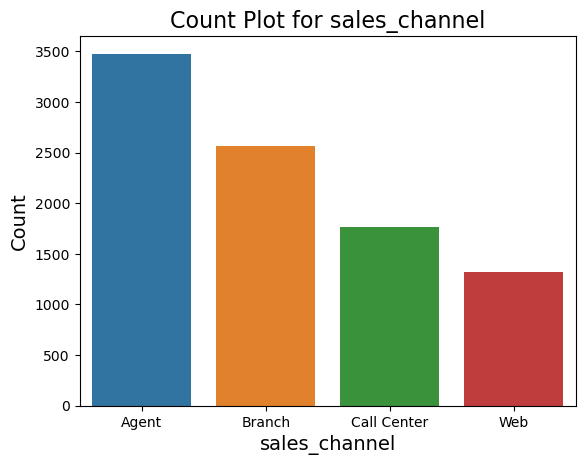

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


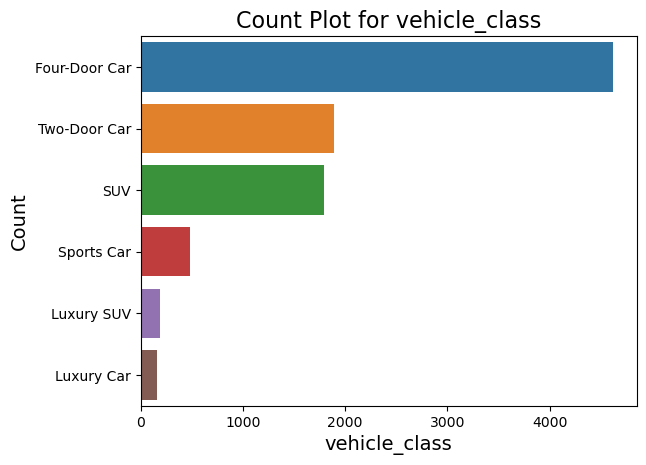

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


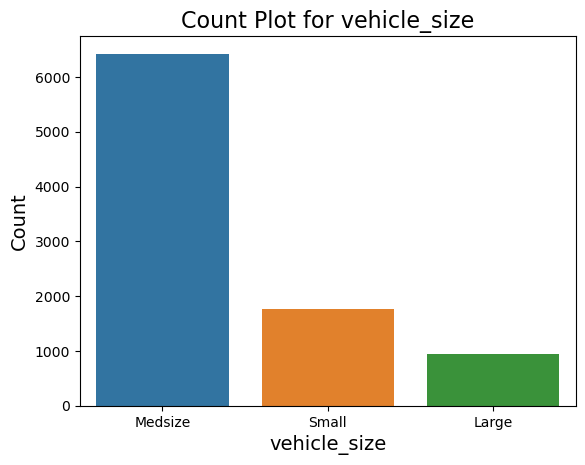

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_countplots(dataframe):
    for column in dataframe.columns:
        
        cardinality = dataframe[column].nunique()

        orient = 'y' if cardinality >= 6 else 'x'
        if orient == 'y':
            sns.countplot(data=dataframe, y=column, order=dataframe[column].value_counts().index)
        else:
            sns.countplot(data=dataframe, x=column, order=dataframe[column].value_counts().index)
        plt.title(f'Count Plot for {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.show()

create_countplots(categorical_columns)

##### policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [19]:
categorical_columns = categorical_columns.drop(columns=['policy_type'])

In [20]:
categorical_columns['policy'].unique()


array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [21]:
categorical_columns['policy'] = categorical_columns['policy'].str.extract(r'(L\d)')
display(categorical_columns)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large


##### Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

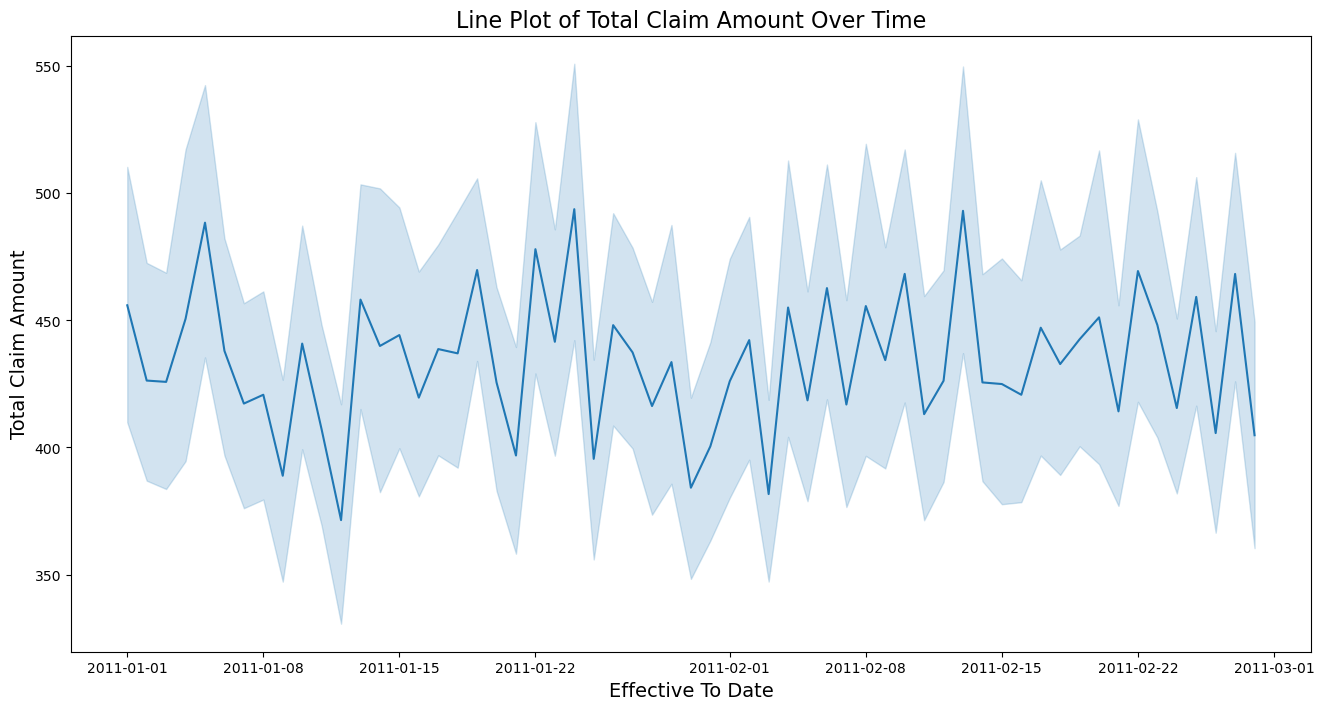

In [22]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_df)

plt.title('Line Plot of Total Claim Amount Over Time', fontsize=16)
plt.xlabel('Effective To Date', fontsize=14)
plt.ylabel('Total Claim Amount', fontsize=14)

plt.show()

#####     To continue the analysis define an empty pandas DataFrame, and add the following new columns:

    day with the day number of effective_to_date
    day_name with the day NAME of effective_to_date
    week with the week of effective_to_date
    month with the month NAME of effective_to_date
    total_claim_amount with total_claim_amount


In [23]:
time_df = pd.DataFrame()

time_df['day'] = customer_df['effective_to_date'].dt.day
time_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
time_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
time_df['month'] = customer_df['effective_to_date'].dt.month_name()
time_df['total_claim_amount'] = customer_df['total_claim_amount']

display(time_df)

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


##### Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [24]:
total_by_day_name = time_df.groupby('day_name')['total_claim_amount'].sum().round(2)
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_by_day_name = total_by_day_name.reindex(index=list_of_correct_days, fill_value=0)

display(total_by_day_name)

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

##### Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf valu

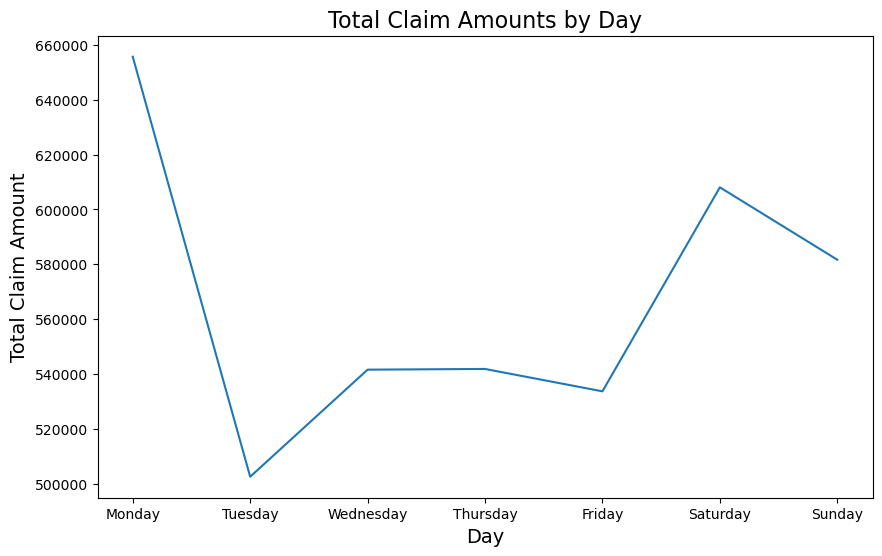

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_by_day_name.index, y=total_by_day_name.values)

plt.title('Total Claim Amounts by Day', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Total Claim Amount', fontsize=14)

plt.show()

In [26]:
total_by_day = time_df.groupby('day')['total_claim_amount'].sum().round(2)

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

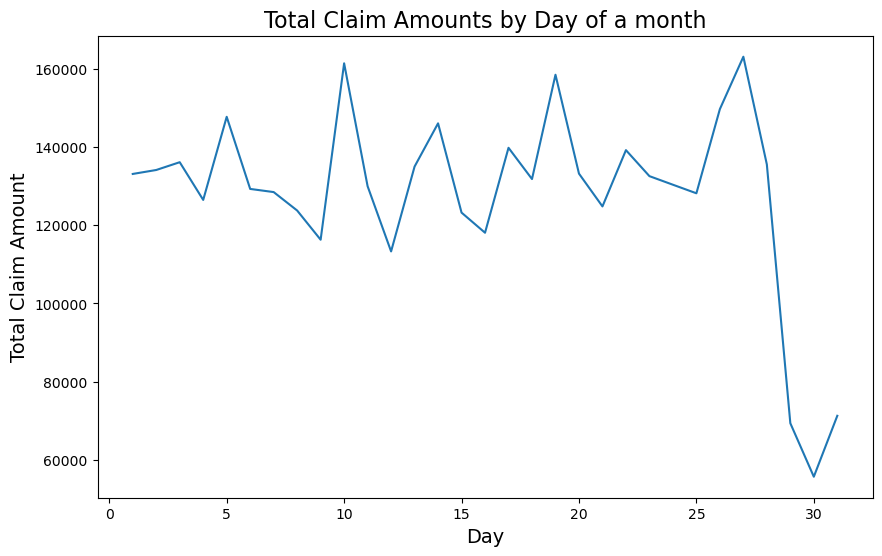

In [27]:

plt.figure(figsize=(10, 6))
sns.lineplot(x=total_by_day.index, y=total_by_day.values)

plt.title('Total Claim Amounts by Day of a month', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Total Claim Amount', fontsize=14)

plt.show()

##                                   ↑
 The majority of the sum of all claims are usually approved on Mondays. 

##### Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [28]:
total_number_by_day_name = time_df.groupby('day_name')['total_claim_amount'].size()
total_number_by_day_name = total_number_by_day_name.reindex(index=list_of_correct_days, fill_value=0)

display(total_number_by_day_name)

day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
Name: total_claim_amount, dtype: int64

##### Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [29]:
median_by_day = time_df.groupby('day_name')['total_claim_amount'].median().round(2)
median_by_day = median_by_day.sort_values(ascending=False)
display(median_by_day)

day_name
Thursday     395.33
Wednesday    392.24
Monday       385.74
Sunday       383.72
Saturday     379.20
Tuesday      378.49
Friday       371.80
Name: total_claim_amount, dtype: float64

##### Plot the median "target" by day of the week name using a seaborn barplot

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


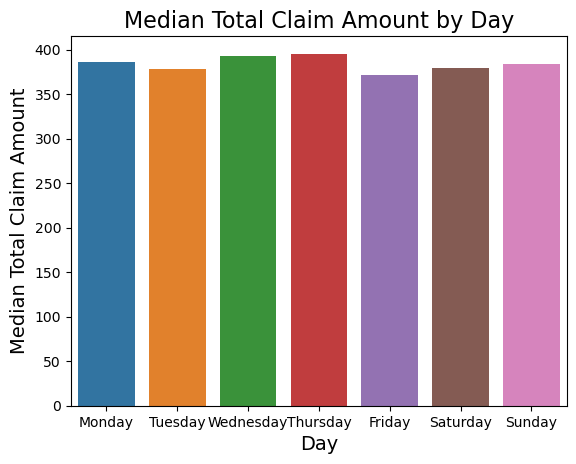

In [30]:
sns.barplot(x=median_by_day.index, y=median_by_day.values, order = list_of_correct_days)

plt.title('Median Total Claim Amount by Day', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Median Total Claim Amount', fontsize=14)
plt.show()

##### What can you conclude from this analysis?

##### 
The number of claim is aproximatelly the same every day. Comparing this plot with the line plot of monetary values of total claims, we can conclude, that on Mondays the total amount of claims are higher then on other days.

##### Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [31]:
total_by_day_name = time_df.groupby('day_name')['total_claim_amount'].sum().round(2)
total_by_month = time_df.groupby('month')['total_claim_amount'].sum().round(2)

list_of_correct_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_by_month = total_by_month.reindex(index=list_of_correct_months, fill_value=0)

display(total_by_month)

month
January      2117142.86
February     1847824.19
March              0.00
April              0.00
May                0.00
June               0.00
July               0.00
August             0.00
September          0.00
October            0.00
November           0.00
December           0.00
Name: total_claim_amount, dtype: float64

##### Can you do a monthly analysis given the output of the previous series? Why?

##### 
We have values only for two month

##### Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [32]:
def detect_outliers_zscore(df: pd.DataFrame, column: str, threshold: int=3) ->list:
 
    df2 = continuous_df
    outliers = []

    df2['abs-z-score'] = np.abs( ( df2[column] - df2[column].mean() ) / df2[column].std(ddof=1) )

    outliers = df2[ df2['abs-z-score'] > threshold ].index.tolist()

    return outliers

In [33]:
outliers_zscore = detect_outliers_zscore(continuous_df, "customer_lifetime_value")
print("Outliers from Z-scores method: ", outliers_zscore)
outliers_zscore = detect_outliers_zscore(continuous_df, "monthly_premium_auto")
print("Outliers from Z-scores method: ", outliers_zscore)
outliers_zscore = detect_outliers_zscore(continuous_df, "total_claim_amount")
print("Outliers from Z-scores method: ", outliers_zscore)

Outliers from Z-scores method:  [50, 51, 79, 125, 232, 266, 303, 315, 373, 375, 385, 404, 407, 408, 512, 541, 626, 681, 820, 832, 836, 856, 914, 1002, 1078, 1120, 1174, 1184, 1233, 1330, 1382, 1392, 1466, 1506, 1521, 1558, 1640, 1657, 1796, 1812, 1824, 1858, 1861, 1974, 2104, 2116, 2136, 2190, 2191, 2294, 2303, 2488, 2504, 2540, 2600, 2652, 2775, 2786, 2908, 3075, 3145, 3162, 3203, 3210, 3217, 3325, 3457, 3465, 3566, 3581, 3595, 3608, 3628, 3634, 3692, 3695, 3760, 3763, 4056, 4074, 4078, 4126, 4128, 4195, 4298, 4369, 4388, 4426, 4443, 4478, 4483, 4584, 4721, 4803, 4811, 4915, 4930, 4944, 4971, 5037, 5059, 5094, 5109, 5196, 5212, 5272, 5279, 5343, 5346, 5403, 5485, 5496, 5554, 5593, 5629, 5647, 5657, 5716, 5765, 5767, 5804, 5824, 5847, 5944, 5987, 6008, 6015, 6102, 6106, 6107, 6158, 6229, 6251, 6252, 6316, 6329, 6461, 6475, 6554, 6569, 6584, 6605, 6606, 6693, 6793, 6796, 6817, 6858, 6861, 6884, 6904, 6977, 6982, 7002, 7102, 7117, 7140, 7172, 7254, 7283, 7291, 7303, 7304, 7316, 7358, 738

C:\Users\vikto\AppData\Local\Temp\ipykernel_28512\1343304382.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['abs-z-score'] = np.abs( ( df2[column] - df2[column].mean() ) / df2[column].std(ddof=1) )


##### Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

C:\Users\vikto\AppData\Local\Temp\ipykernel_28512\1300644055.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_zscore.drop(outliers_zscore, axis=0, inplace=True)
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: Futu

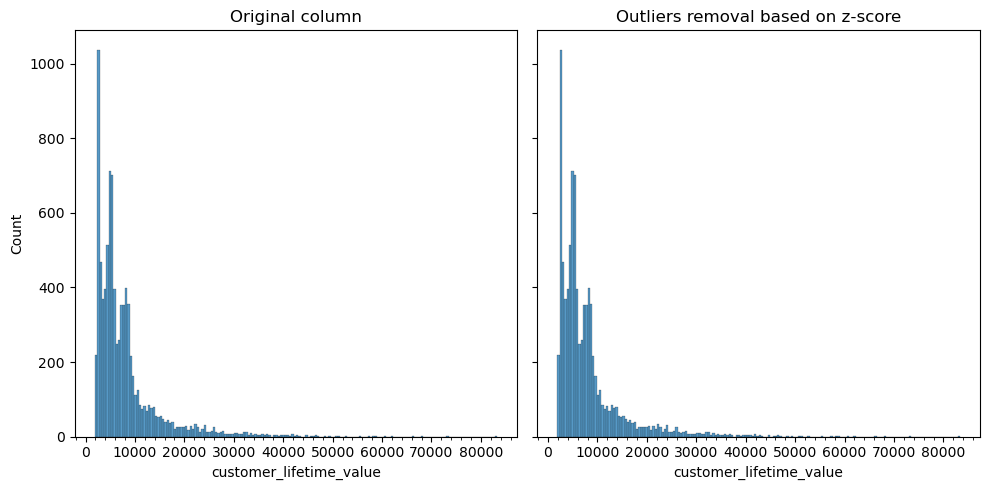

In [34]:
from matplotlib.ticker import AutoMinorLocator

no_outliers_zscore = continuous_df

no_outliers_zscore.drop(outliers_zscore, axis=0, inplace=True)

fig, ax = plt.subplots(1,2,  sharey=True, sharex=True, figsize=(10,5))
sns.histplot(data=continuous_df, x="customer_lifetime_value", ax = ax[0])
ax[0].set_title("Original column")
ax[0].xaxis.set_minor_locator(AutoMinorLocator(5))
#ax[0].grid()
sns.histplot(data=no_outliers_zscore, x="customer_lifetime_value", ax = ax[1])
ax[1].set_title("Outliers removal based on z-score")
ax[1].xaxis.set_minor_locator(AutoMinorLocator(5))
#ax[1].grid()

plt.tight_layout()
plt.show()

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

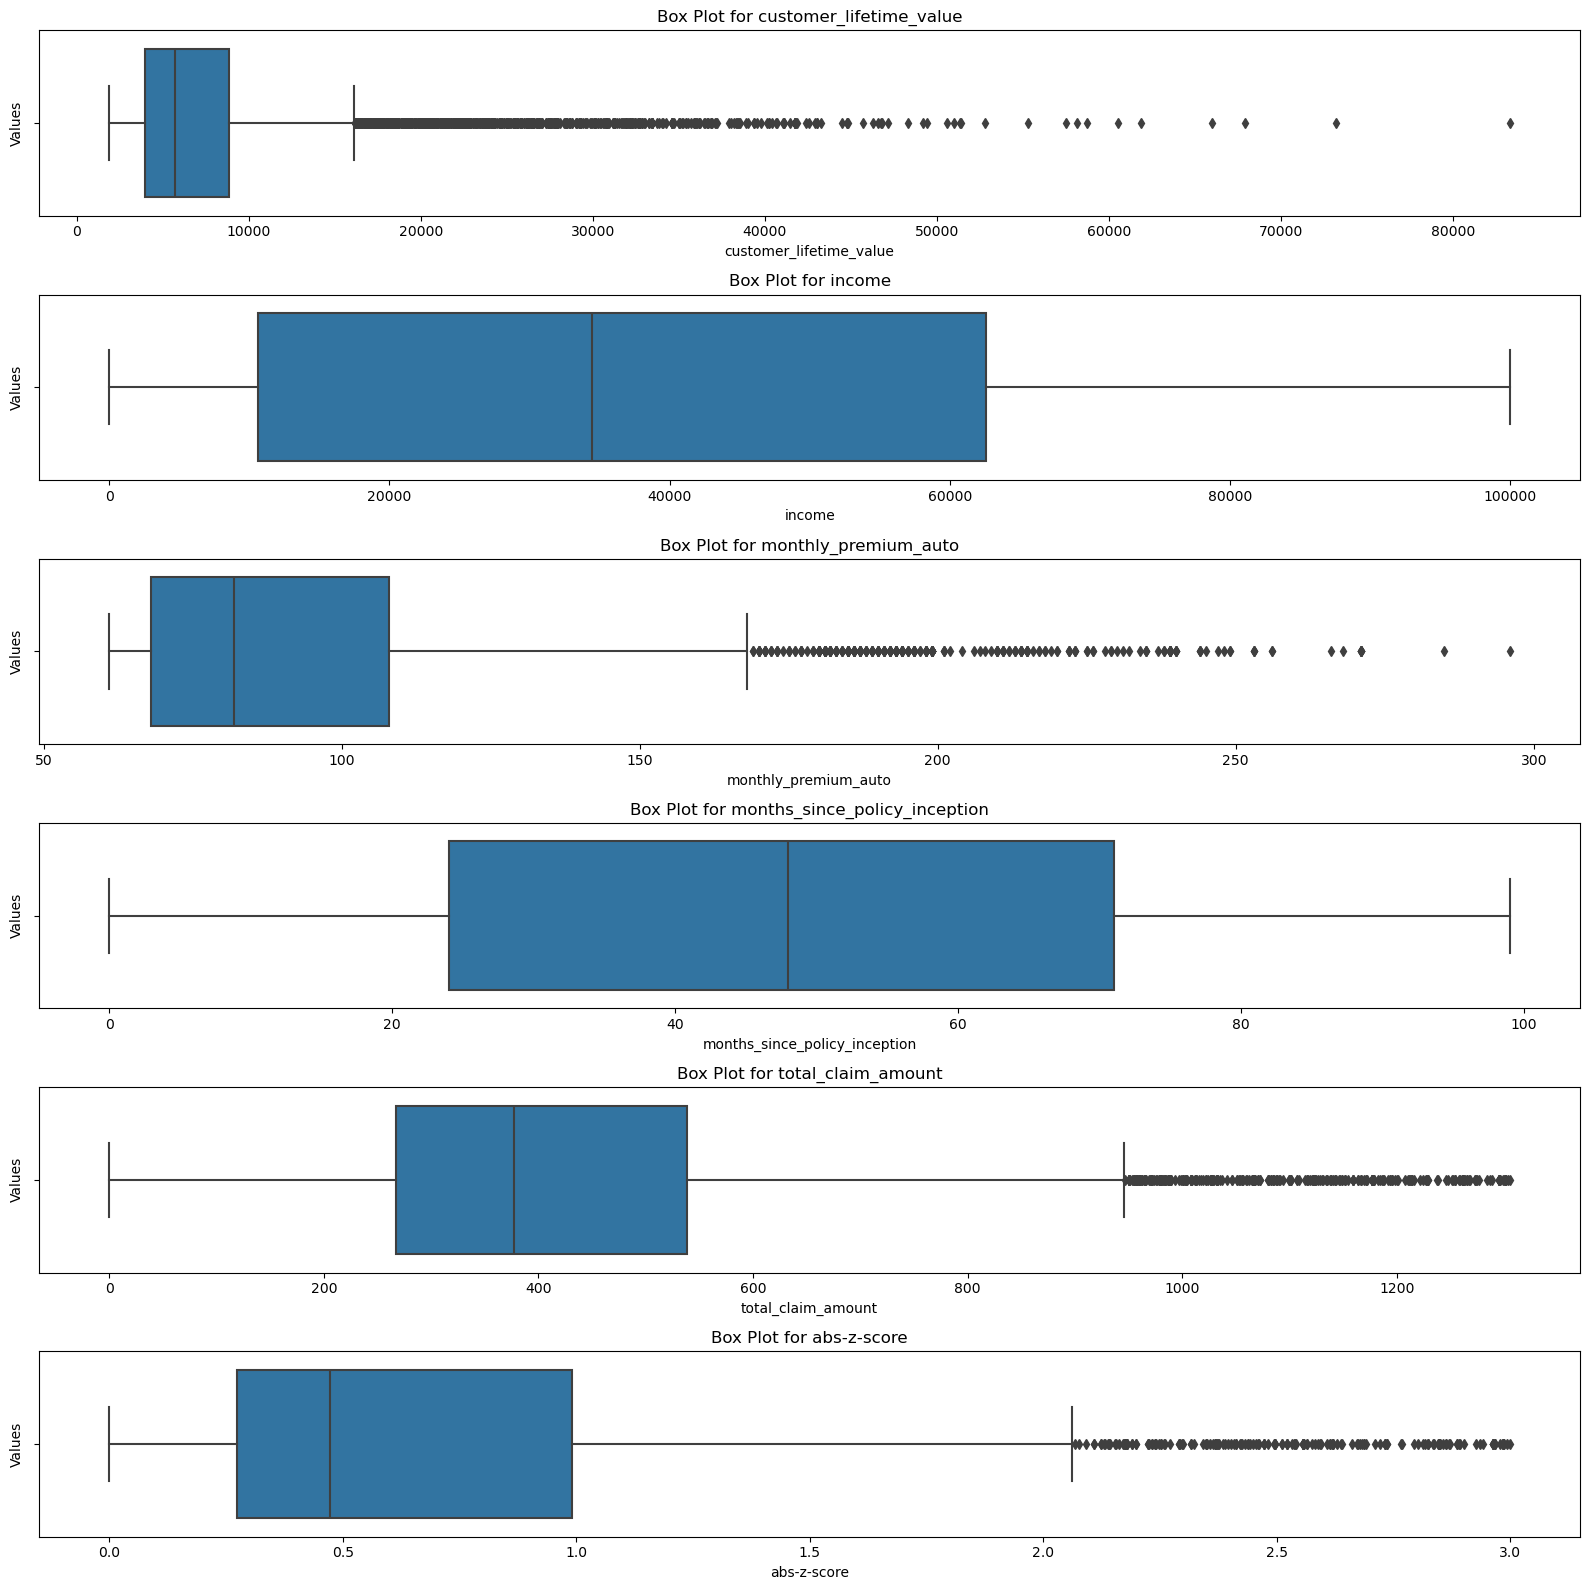

In [35]:
create_individual_boxplots(no_outliers_zscore)

In [50]:
no_outliers_zscore

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,abs-z-score
0,2763.519279,56274,69,5,384.811147,0.169630
1,6979.535903,0,94,42,1131.464935,2.400606
2,12887.431650,48767,108,38,566.472247,0.455709
3,7645.861827,0,106,65,529.881344,0.329750
4,2813.692575,43836,73,44,138.130879,1.018788
...,...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764,0.811890
9130,3096.511217,21604,79,28,379.200000,0.188946
9131,8163.890428,0,85,37,790.784983,1.227869
9132,7524.442436,21941,96,3,691.200000,0.885064


#####

##### Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [36]:
concatenated_df = pd.concat([continuous_df, discrete_df, categorical_columns, time_df[['day', 'day_name']]], axis=1)

final_df = concatenated_df.dropna().reset_index(drop=True)

display(final_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,0.169630,32,0,1,Washington,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,2.400606,13,0,8,Arizona,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,0.455709,18,0,2,Nevada,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,0.329750,18,0,7,California,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,1.018788,12,0,1,Washington,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,198.234764,0.811890,18,0,2,California,...,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday
8972,3096.511217,21604.0,79.0,28.0,379.200000,0.188946,14,0,1,California,...,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday
8973,8163.890428,0.0,85.0,37.0,790.784983,1.227869,9,3,2,California,...,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday
8974,7524.442436,21941.0,96.0,3.0,691.200000,0.885064,34,0,3,California,...,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday


##### Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [37]:
final_df = final_df[[col for col in final_df.columns if col != 'total_claim_amount'] + ['total_claim_amount']]
display(final_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,0.169630,32,0,1,Washington,No,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,384.811147
1,6979.535903,0.0,94.0,42.0,2.400606,13,0,8,Arizona,No,...,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,1131.464935
2,12887.431650,48767.0,108.0,38.0,0.455709,18,0,2,Nevada,No,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,566.472247
3,7645.861827,0.0,106.0,65.0,0.329750,18,0,7,California,No,...,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,529.881344
4,2813.692575,43836.0,73.0,44.0,1.018788,12,0,1,Washington,No,...,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,0.811890,18,0,2,California,No,...,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,198.234764
8972,3096.511217,21604.0,79.0,28.0,0.188946,14,0,1,California,Yes,...,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,379.200000
8973,8163.890428,0.0,85.0,37.0,1.227869,9,3,2,California,No,...,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,790.784983
8974,7524.442436,21941.0,96.0,3.0,0.885064,34,0,3,California,No,...,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,691.200000


##### Turn the response column values into (Yes=1/No=0).

In [38]:
final_df['response'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [39]:
display(final_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,0.169630,32,0,1,Washington,0,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,384.811147
1,6979.535903,0.0,94.0,42.0,2.400606,13,0,8,Arizona,0,...,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,1131.464935
2,12887.431650,48767.0,108.0,38.0,0.455709,18,0,2,Nevada,0,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,566.472247
3,7645.861827,0.0,106.0,65.0,0.329750,18,0,7,California,0,...,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,529.881344
4,2813.692575,43836.0,73.0,44.0,1.018788,12,0,1,Washington,0,...,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,0.811890,18,0,2,California,0,...,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,198.234764
8972,3096.511217,21604.0,79.0,28.0,0.188946,14,0,1,California,1,...,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,379.200000
8973,8163.890428,0.0,85.0,37.0,1.227869,9,3,2,California,0,...,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,790.784983
8974,7524.442436,21941.0,96.0,3.0,0.885064,34,0,3,California,0,...,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,691.200000


##### Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [40]:
final_df['education'] = final_df['education'].replace({'Master': 'Graduate', 'Doctor': 'Graduate'})
final_df['education'].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

##### Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [41]:
final_df['employmentstatus'] = final_df['employmentstatus'].replace({'Medical Leave': 'Inactive', 'Disabled': 'Inactive', 'Retired': 'Inactive'})
final_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

##### Deal with column Gender turning the values into (1/0).

In [42]:
final_df['gender'].replace({'F': 1, 'M': 0}, inplace=True)
final_df['gender'].unique()

array([1, 0], dtype=int64)

##### Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [43]:
final_df['vehicle_class'] = final_df['vehicle_class'].replace({'Sports Car': 'Luxury', 'Luxury SUV': 'Luxury', 'Luxury Car': 'Luxury'})
final_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

##### Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [44]:
implicit_ordering = {'Basic': 1, 'Extended': 2, 'Premium': 3}
final_df['coverage'] = final_df['coverage'].map(implicit_ordering)
display(final_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,0.169630,32,0,1,Washington,0,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,384.811147
1,6979.535903,0.0,94.0,42.0,2.400606,13,0,8,Arizona,0,...,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,1131.464935
2,12887.431650,48767.0,108.0,38.0,0.455709,18,0,2,Nevada,0,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,566.472247
3,7645.861827,0.0,106.0,65.0,0.329750,18,0,7,California,0,...,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,529.881344
4,2813.692575,43836.0,73.0,44.0,1.018788,12,0,1,Washington,0,...,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,0.811890,18,0,2,California,0,...,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,198.234764
8972,3096.511217,21604.0,79.0,28.0,0.188946,14,0,1,California,1,...,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,379.200000
8973,8163.890428,0.0,85.0,37.0,1.227869,9,3,2,California,0,...,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,790.784983
8974,7524.442436,21941.0,96.0,3.0,0.885064,34,0,3,California,0,...,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,691.200000


##### Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [45]:
implicit_ordering = {'Employed': 1, 'Inactive': 2, 'Unemployed': 3}
final_df['employmentstatus'] = final_df['employmentstatus'].map(implicit_ordering)
display(final_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,0.169630,32,0,1,Washington,0,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,384.811147
1,6979.535903,0.0,94.0,42.0,2.400606,13,0,8,Arizona,0,...,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,1131.464935
2,12887.431650,48767.0,108.0,38.0,0.455709,18,0,2,Nevada,0,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,566.472247
3,7645.861827,0.0,106.0,65.0,0.329750,18,0,7,California,0,...,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,529.881344
4,2813.692575,43836.0,73.0,44.0,1.018788,12,0,1,Washington,0,...,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,0.811890,18,0,2,California,0,...,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,198.234764
8972,3096.511217,21604.0,79.0,28.0,0.188946,14,0,1,California,1,...,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,379.200000
8973,8163.890428,0.0,85.0,37.0,1.227869,9,3,2,California,0,...,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,790.784983
8974,7524.442436,21941.0,96.0,3.0,0.885064,34,0,3,California,0,...,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,691.200000


##### Encode the column location_code as: "Urban" > "Suburban" > "Rural".

In [46]:
implicit_ordering = {'Urban': 1, 'Suburban': 2, 'Rural': 3}
final_df['location_code'] = final_df['location_code'].map(implicit_ordering)
display(final_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,0.169630,32,0,1,Washington,0,...,2,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,384.811147
1,6979.535903,0.0,94.0,42.0,2.400606,13,0,8,Arizona,0,...,2,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,1131.464935
2,12887.431650,48767.0,108.0,38.0,0.455709,18,0,2,Nevada,0,...,2,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,566.472247
3,7645.861827,0.0,106.0,65.0,0.329750,18,0,7,California,0,...,2,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,529.881344
4,2813.692575,43836.0,73.0,44.0,1.018788,12,0,1,Washington,0,...,3,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,0.811890,18,0,2,California,0,...,1,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,198.234764
8972,3096.511217,21604.0,79.0,28.0,0.188946,14,0,1,California,1,...,2,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,379.200000
8973,8163.890428,0.0,85.0,37.0,1.227869,9,3,2,California,0,...,2,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,790.784983
8974,7524.442436,21941.0,96.0,3.0,0.885064,34,0,3,California,0,...,2,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,691.200000


##### Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [47]:
implicit_ordering = {'Large': 1, 'Medsize': 2, 'Small': 3}
final_df['vehicle_size'] = final_df['vehicle_size'].map(implicit_ordering)
display(final_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,0.169630,32,0,1,Washington,0,...,2,Married,L3,Offer1,Agent,Two-Door Car,2,24,Thursday,384.811147
1,6979.535903,0.0,94.0,42.0,2.400606,13,0,8,Arizona,0,...,2,Single,L3,Offer3,Agent,Four-Door Car,2,31,Monday,1131.464935
2,12887.431650,48767.0,108.0,38.0,0.455709,18,0,2,Nevada,0,...,2,Married,L3,Offer1,Agent,Two-Door Car,2,19,Saturday,566.472247
3,7645.861827,0.0,106.0,65.0,0.329750,18,0,7,California,0,...,2,Married,L2,Offer1,Call Center,SUV,2,20,Thursday,529.881344
4,2813.692575,43836.0,73.0,44.0,1.018788,12,0,1,Washington,0,...,3,Single,L1,Offer1,Agent,Four-Door Car,2,3,Thursday,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,0.811890,18,0,2,California,0,...,1,Married,L1,Offer2,Web,Four-Door Car,2,10,Thursday,198.234764
8972,3096.511217,21604.0,79.0,28.0,0.188946,14,0,1,California,1,...,2,Divorced,L3,Offer1,Branch,Four-Door Car,2,12,Saturday,379.200000
8973,8163.890428,0.0,85.0,37.0,1.227869,9,3,2,California,0,...,2,Single,L2,Offer1,Branch,Four-Door Car,2,6,Sunday,790.784983
8974,7524.442436,21941.0,96.0,3.0,0.885064,34,0,3,California,0,...,2,Married,L2,Offer3,Branch,Four-Door Car,1,3,Thursday,691.200000


In [52]:
final_df.dtypes

customer_lifetime_value          float64
income                           float64
monthly_premium_auto             float64
months_since_policy_inception    float64
abs-z-score                      float64
months_since_last_claim            int64
number_of_open_complaints          int64
number_of_policies                 int64
state                             object
response                           int64
coverage                           int64
education                         object
employmentstatus                   int64
gender                             int64
location_code                      int64
marital_status                    object
policy                            object
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                       int64
day                                int32
day_name                          object
total_claim_amount               float64
dtype: object

##### Get a dataframe with the categorical nominal columns

In [63]:
selected_columns = categorical_columns.columns.tolist()
categorical_nominal_columns = final_df[selected_columns].select_dtypes(include='int64')

In [64]:
categorical_nominal_columns

,response,coverage,employmentstatus,gender,location_code,vehicle_size
0,0,1,1,1,2,2
1,0,2,3,1,2,2
2,0,3,1,1,2,2
3,0,1,3,0,2,2
4,0,1,1,0,3,2
...,...,...,...,...,...,...
8971,0,1,1,0,1,2
8972,1,2,1,1,2,2
8973,0,2,3,0,2,2
8974,0,2,1,0,2,1


#####     Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

In [67]:
categorical_column_names = categorical_nominal_columns.columns.tolist()

levels = []

for column_name in categorical_column_names:

    unique_values = final_df[column_name].unique().tolist()

    levels.append(unique_values)
    
levels

[[0, 1], [1, 2, 3], [1, 3, 2], [1, 0], [2, 3, 1], [2, 3, 1]]

##### Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [80]:
from sklearn.preprocessing import OneHotEncoder

# Sort each level in the 'levels' list
sorted_levels = [sorted(level) for level in levels]

# Instantiate OneHotEncoder with drop set to 'first' and categories set to sorted_levels
encoder = OneHotEncoder(drop='first', categories=sorted_levels)

# Fit the encoder with the values of the DataFrame
encoder.fit(categorical_nominal_columns.values)

# Display the encoder object
print(encoder)
categorical_nominal_encoded =encoder.transform(categorical_nominal_columns).toarray()
col_names = encoder.get_feature_names_out(categorical_nominal_columns.columns)
categorical_nominal_encoded  = pd.DataFrame(categorical_nominal_encoded, columns=col_names,  index=categorical_nominal_columns.index)
display(categorical_nominal_encoded.head())

OneHotEncoder(categories=[[0, 1], [1, 2, 3], [1, 2, 3], [0, 1], [1, 2, 3],
                          [1, 2, 3]],
              drop='first')


C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


,response_1,coverage_2,coverage_3,employmentstatus_2,employmentstatus_3,gender_1,location_code_2,location_code_3,vehicle_size_2,vehicle_size_3
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


#####

#####